<a href="https://colab.research.google.com/github/sap156/infinityskillshub/blob/main/Extracting_Data_from_Web_Scrapes_and_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Data Professionals
# Data Parsing and Extraction — Module 3 Part 2
# Extracting Data from Web Scrapes and Images

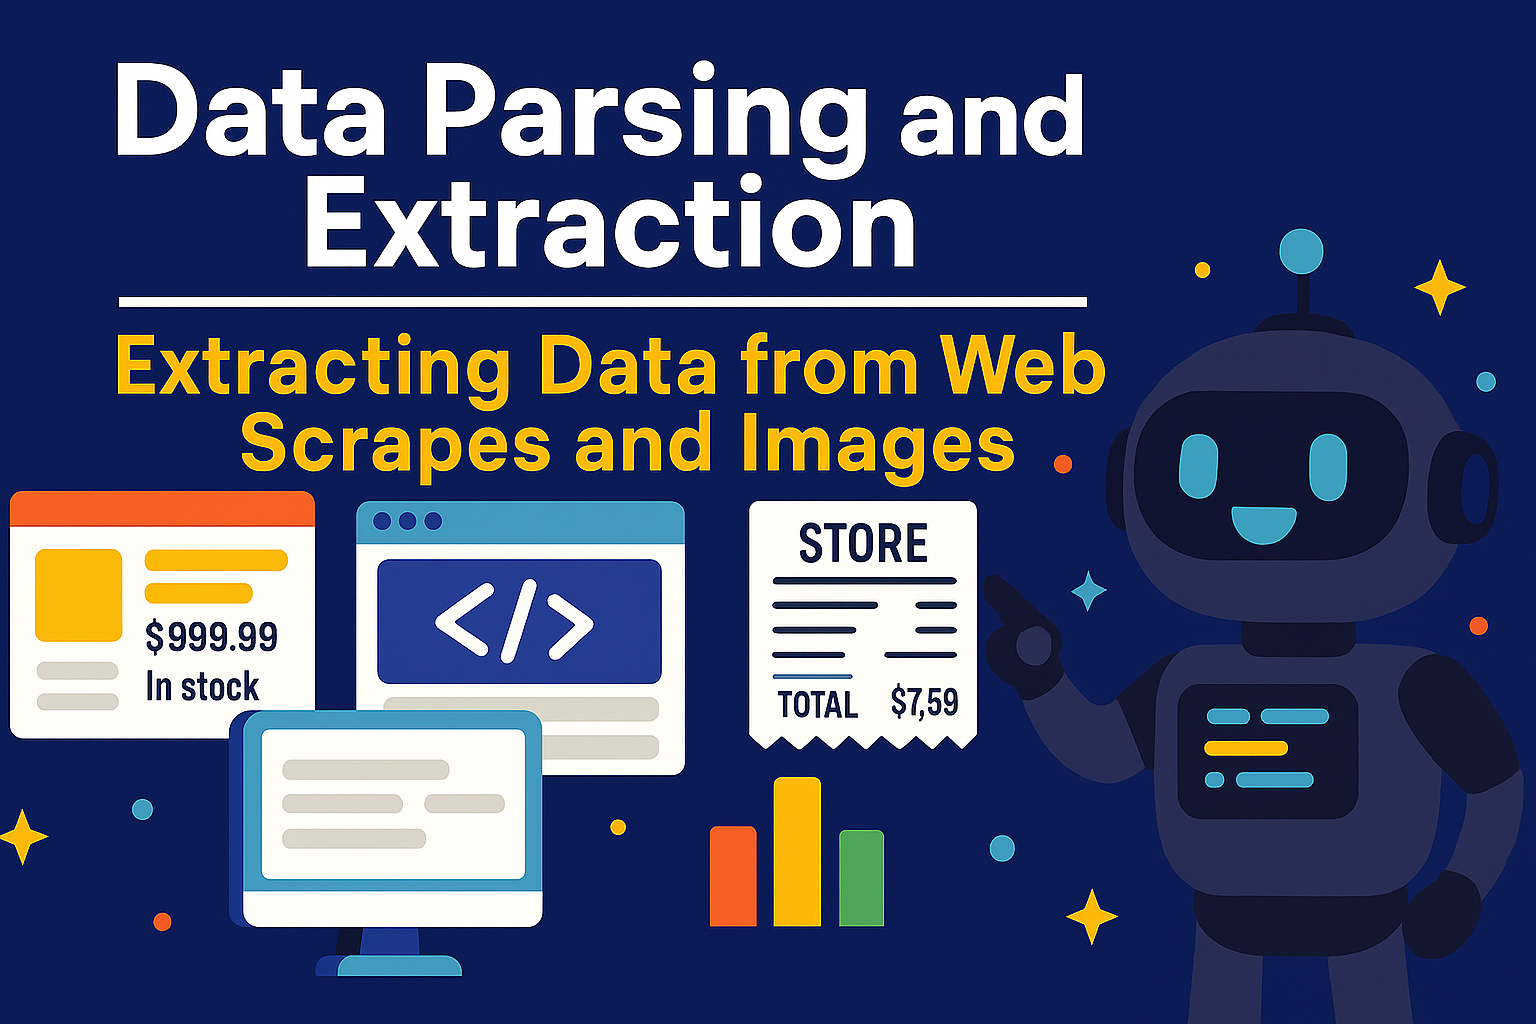

# 🌐 Extracting Data from Web Scrapes and Images

**Data extraction is one of the most powerful applications of generative AI, allowing
data engineers to convert unstructured or semi-structured data into structured formats.**

Traditional extraction methods require predefined rules, regex-based parsing, or specific
libraries like BeautifulSoup. However, these methods often fail when the structure of
the input data changes.

Generative AI can extract relevant features from diverse formats, such as HTML, news
articles, tabular data, and even images. The adaptability of AI-powered extraction
ensures robustness against format variations, making it a crucial tool for modern
data engineering tasks.

This article explores various ways to extract structured data using generative AI, covering:
1. Extracting product details from an HTML page
2. Parsing websites for key insights
3. Extracting tabular data from HTML tables
4. Extracting structured data from images (e.g., receipts)

**Learning Objectives:**
- ✅ Extract product details from HTML pages without parsing rules
- ✅ Parse websites for key insights automatically
- ✅ Convert HTML tables to structured DataFrames
- ✅ Extract structured data from images (receipts, documents)
- ✅ Build robust, adaptable scraping solutions

In [5]:
# =====================================================
# 🛠️ SETUP AND IMPORTS
# =====================================================

from openai import OpenAI
import pandas as pd
import json
import numpy as np
import requests
from pprint import pprint
from bs4 import BeautifulSoup
from google.colab import userdata


api_key=userdata.get('OPENAI_API_KEY')

# Set up our AI client securely
client = OpenAI(api_key=api_key)

def clean(dict_variable):
    return next(iter(dict_variable.values()))

print("✅ Environment ready for time series generation!")


✅ Environment ready for time series generation!


# =====================================================
# 🛍️ EXTRACTING PRODUCT DETAILS FROM HTML
# =====================================================

## 1. Extracting Product Details from an HTML Page

Imagine you're scraping an e-commerce site and want to extract essential details
such as product name, price, features, and availability from its HTML. Traditional
methods rely on predefined HTML tags, but generative AI allows flexibility when
the structure changes.

**Example: Extracting product data from an HTML page**

In [3]:
# Sample product page HTML (simplified)
sample_html = """
<div class="product-updated">
  <h3>Apple iPhone 16 Pro</h3>
  <p class="price">$999.99</p>
  <ul class="features">
    <li>Wireless Charging</li>
    <li>Apple Intellegance</li>
    <li>48MP Camera</li>
  </ul>
  <p class="availability">In stock</p>
</div>
"""

# OpenAI API call
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that extracts product information from HTML."},
        {"role": "user", "content": f"Extract the product name, price, features, and availability from this HTML. Output in JSON form:\n{sample_html}"}
    ],
    response_format={"type": "json_object"}
)

# Print the extracted data
print(json.dumps(json.loads(response.choices[0].message.content), indent=2))


{
  "product_name": "Apple iPhone 16 Pro",
  "price": "$999.99",
  "features": [
    "Wireless Charging",
    "Apple Intellegance",
    "48MP Camera"
  ],
  "availability": "In stock"
}


# =====================================================
# 🌐 PARSING WEBSITES FOR KEY INSIGHTS
# =====================================================


## 2. Parsing Websites for Key Insights

Scraping and extracting data from the web can be a complex task due to variations
in page structures. Generative AI simplifies this by focusing on semantic content
rather than fixed tags.

**Example: Extracting product details from an online store**

In [13]:
# Fetch a sample news article
url = "https://9to5google.com/2025/06/13/galaxy-z-fold-7-promo-stand-leak-thin"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# OpenAI API call
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that extracts key information news articles."},
        {"role": "user", "content": f"Extract key information and summarise in short. Output in JSON form:\n{str(response.text)}..."}
    ],
    response_format={"type": "json_object"}
)

# Print the extracted data
print(json.dumps(json.loads(response.choices[0].message.content), indent=2))

{
  "title": "Samsung's Galaxy Z Fold 7 looks incredibly thin in latest leak [Gallery]",
  "author": "Ben Schoon",
  "datePublished": "2025-06-13T16:15:00+00:00",
  "description": "The Galaxy Z Fold 7 looks incredibly thin in leaked retail marketing that shows the full design for the first time.",
  "url": "https://9to5google.com/2025/06/13/galaxy-z-fold-7-promo-stand-leak-thin/",
  "image": {
    "url": "https://9to5google.com/wp-content/uploads/sites/4/2025/06/galaxy-z-fold-7-marketing-stand-1.jpg?quality=82&strip=all",
    "width": 1200,
    "height": 600
  },
  "keyPoints": [
    "The Galaxy Z Fold 7 is expected to be thinner than its predecessors, measuring just 9mm when closed and about 4.5mm when opened.",
    "Promotional images show the device's significantly reduced bulk compared to the previous models.",
    "Samsung is enhancing the device with AI-infused cameras and a wider display aspect ratio.",
    "The full reveal of the Galaxy Z Fold 7 is expected in early July."
  ],

# =====================================================
# 📊 EXTRACTING TABULAR DATA FROM HTML
# =====================================================


## 3. Extracting Tabular Data from HTML

Websites often contain structured data within tables, which can be challenging to
parse using traditional methods. With generative AI, extracting and structuring
tabular data into a JSON or DataFrame format is straightforward.

**Example: Extracting tabular data from HTML**

In [15]:
# Sample HTML table
html_table = """
<table>
  <tr>
    <th>Name</th>
    <th>Age</th>
    <th>City</th>
  </tr>
  <tr>
    <td>Abhinav</td>
    <td>29</td>
    <td>Texas</td>
  </tr>
  <tr>
    <td>Chris</td>
    <td>30</td>
    <td>Pittsburgh</td>
  </tr>
  <tr>
    <td>Bhim/td>
    <td>33</td>
    <td>California</td>
  </tr>
</table>
"""

# OpenAI API call
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that extracts tabular data from HTML."},
        {"role": "user", "content": f"Extract the data from this HTML table into a JSON format. Output in JSON form:\n{html_table}"}
    ],
    response_format={"type": "json_object"}
)

# Convert JSON to DataFrame
data = json.loads(response.choices[0].message.content)
df = pd.DataFrame(clean(data))

# Display the DataFrame
print(df)


      Name  Age        City
0  Abhinav   29       Texas
1    Chris   30  Pittsburgh
2     Bhim   33  California


# =====================================================
# 🖼️ EXTRACTING DATA FROM IMAGES
# =====================================================


## 4. Extracting Data from Images

Generative AI can extract text-based information from images such as receipts,
business cards, and invoices using vision models.

**Example: Extracting receipt details from an image**
URL: https://ocr.space/Content/Images/receipt-ocr-original.webp

In [16]:
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Extract the store name, date, and total. Put the results in a JSON, with keys 'store_name', 'date', and 'total'"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://ocr.space/Content/Images/receipt-ocr-original.webp",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

```json
{
  "store_name": "Walmart",
  "date": "07/28/17",
  "total": "98.21"
}
```


# =====================================================
# 🎯 CONCLUSION
# =====================================================


## Conclusion

Generative AI revolutionizes data extraction by making it robust, adaptable, and
significantly faster than traditional parsing methods. Whether dealing with HTML
content, tabular data, or images, AI models can dynamically adapt to structural
changes, ensuring high accuracy and flexibility.

With the ability to extract insights from multiple formats seamlessly, generative AI
is an indispensable tool for data engineers handling large-scale unstructured data
processing.

By integrating AI-powered extraction methods, businesses can reduce manual effort,
improve data reliability, and enhance overall operational efficiency. 🚀